In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [5]:
df = pd.read_csv('dataset_scikit.csv')

In [6]:
df.shape

(500, 2)

In [9]:
df.columns

Index(['horas_estudo_mes', 'salario'], dtype='object')

In [10]:
df.head()

,horas_estudo_mes,salario
0,57.0,6813.0
1,48.0,6855.0
2,60.0,5801.0
3,73.0,7431.0
4,46.0,5475.0


In [11]:
df.describe()

,horas_estudo_mes,salario
count,500.000000,500.000000
mean,50.060000,6018.930000
std,14.659406,848.697853
min,1.000000,3664.000000
25%,39.750000,5473.000000
50%,50.000000,6013.500000
75%,60.000000,6542.000000
max,100.000000,9348.000000


In [12]:
df.isnull().sum()

horas_estudo_mes    0
salario             0
dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   horas_estudo_mes  500 non-null    float64
 1   salario           500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [16]:
df.corr()

,horas_estudo_mes,salario
horas_estudo_mes,1.000000,0.818576
salario,0.818576,1.000000


<Axes: xlabel='horas_estudo_mes', ylabel='Count'>

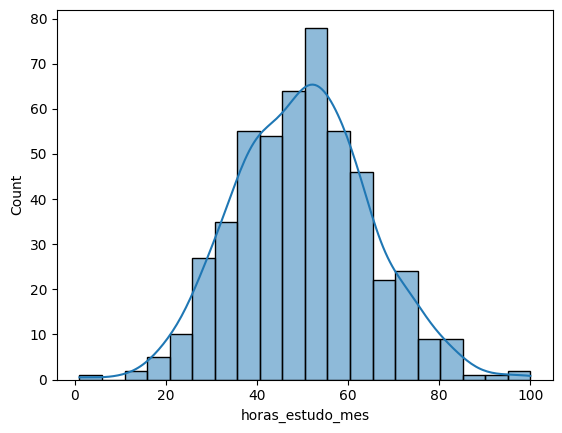

In [17]:
sns.histplot(data=df, x='horas_estudo_mes', kde=True)

In [20]:
# Preparação dos dados
X = np.array(df['horas_estudo_mes'])
# Regressão:  x -> variavel de entrada; y -> variavel de saida

In [21]:
type(X)

numpy.ndarray

In [22]:
X = X.reshape(-1,1)
# Transformando os dados em um tipo que o scikit-learn possa receber

In [23]:
type(X)

numpy.ndarray

In [24]:
y = df['salario']

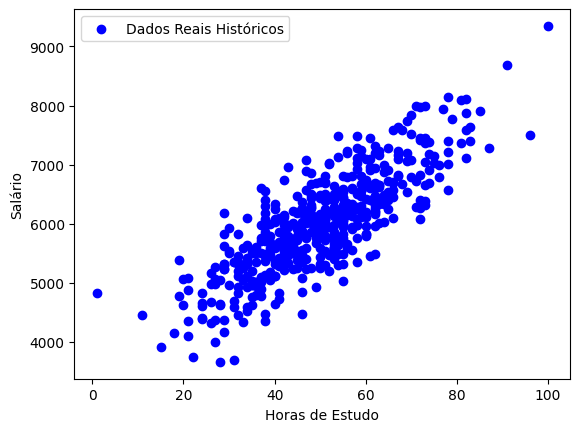

In [55]:

plt.scatter(X,y,color='blue',label='Dados Reais Históricos')
plt.xlabel('Horas de Estudo')
plt.ylabel('Salário')
plt.legend()
plt.show()

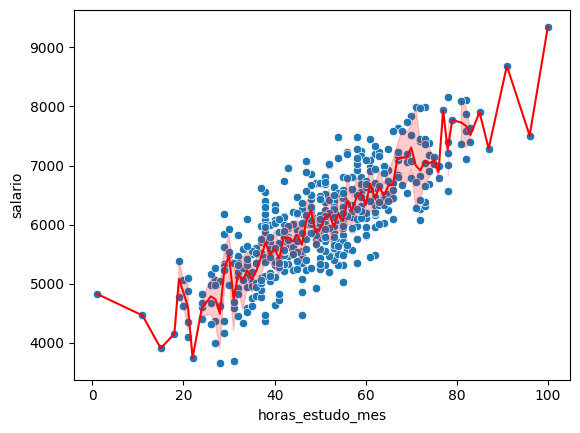

In [32]:
sns.scatterplot(data=df, x='horas_estudo_mes', y='salario')
sns.lineplot(data=df, x='horas_estudo_mes', y='salario', color='red')

plt.show()

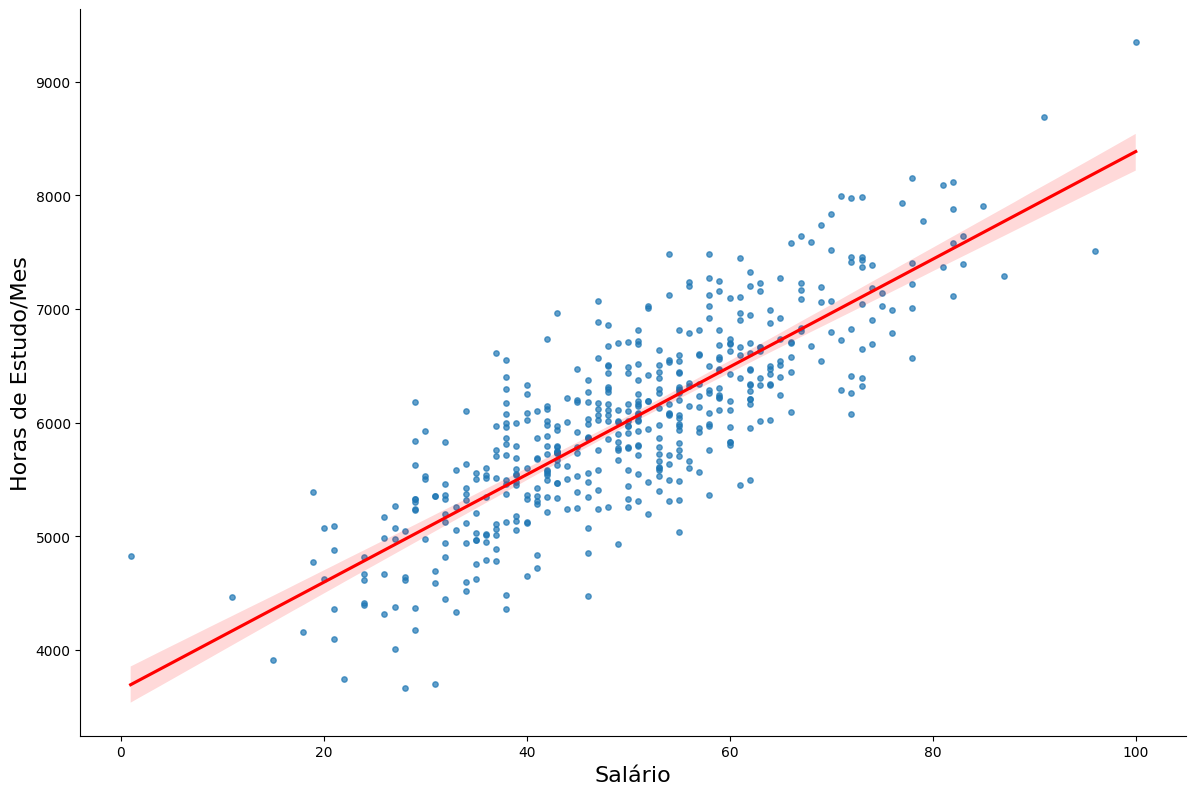

In [41]:
# Criação do gráfico com personalizações usando matplotlib
grafico = sns.lmplot(data=df, x='horas_estudo_mes', y='salario', order=1, scatter_kws={"s": 15, "alpha": 0.7}, line_kws={"color": "red"}, height=8, aspect=1.5)
grafico.set_axis_labels("Salário", "Horas de Estudo/Mes", fontsize=16)

# line_kws define a cord da linbha de tendencia
# scatter_kws define os atributos do ponto de dispersão
# order é usado para alterar o polinomio do grau da regressão polinomial, a alteração do grau impacta no treinamento
# dos dados, podendo ajudar na previsão ou atrapalhar na previsão dos dados

# Mostra o gráfico
plt.show()

In [43]:
# Vamos dividir os dados em treinamento, e teste.
# Isso ocorre porque assim que treinarmos o modelo, como o validaremos? desse modo, separamos uma parte para o teste, e outra para validar o teste;
X_treino, X_teste, y_treino, y_teste = train_test_split(X,y,test_size=0.2,random_state=42)
# Args: X, y, test_size=0.2 -> (20% dos dados para teste de analise); random_state -> seed da aleatoriedade

In [45]:
X_treino.shape # X é matriz, porisso (400,1) pois são 400 linhas para 1 coluna

(400, 1)

In [47]:
X_teste.shape

(100, 1)

In [48]:
y_treino.shape # y é um vetor, por isso não possui coluna, essa alteração foi feita no reshape, para adaptarmos os dados para o treinamento.

(400,)

In [49]:
y_teste.shape

(100,)

In [51]:
# Criando e instanciando o objeto
modelo = LinearRegression()

In [52]:
# Treinando o modelo de regressão linear
modelo.fit(X_treino,y_treino)

LinearRegression()

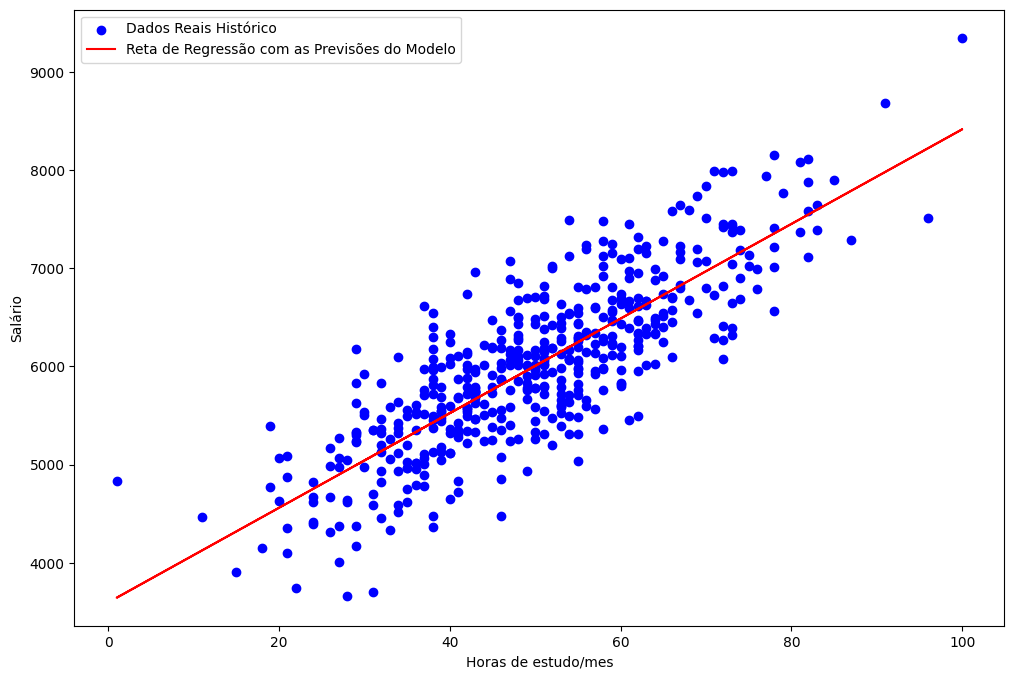

In [56]:
plt.figure(figsize = (12,8))
plt.scatter(X,y,color='blue',label='Dados Reais Histórico')
plt.plot(X,modelo.predict(X), color='red', label='Reta de Regressão com as Previsões do Modelo')
plt.xlabel('Horas de estudo/mes')
plt.ylabel('Salário')
plt.legend()
plt.show()

In [60]:
# Avalia o modelo nos dados de teste
score = modelo.score(X_teste,y_teste)
print(f'Coeficiente R-square {score:.2f}')

Coeficiente R-square 0.59


In [61]:
modelo.intercept_

3596.7837243727545

In [62]:
modelo.coef_

array([48.18185277])

In [63]:
# Deploy do modelo
# Usaremos o modelo para prever o salário com base nas horas de estudo

In [64]:
# Definindo um novo valor para horas de estudo
horas_estudo_novo = np.array([[48]])

# Faz a previsão com o modelo treinado
salario_previsto = modelo.predict(horas_estudo_novo)

print(f'Se você estudar cerca de {horas_estudo_novo} horas por mês seu salário ficará em torno de {salario_previsto}')

Se você estudar cerca de [[48]] horas por mês seu salário ficará em torno de [5909.5126574]


In [65]:
# Definindo um novo valor para horas de estudo
horas_estudo_novo = np.array([[65]])

# Faz a previsão com o modelo treinado
salario_previsto = modelo.predict(horas_estudo_novo)

print(f'Se você estudar cerca de {horas_estudo_novo} horas por mês seu salário ficará em torno de {salario_previsto}')

Se você estudar cerca de [[65]] horas por mês seu salário ficará em torno de [6728.60415452]


In [66]:
# Definindo um novo valor para horas de estudo
horas_estudo_novo = np.array([[73]])

# Faz a previsão com o modelo treinado
salario_previsto = modelo.predict(horas_estudo_novo)

print(f'Se você estudar cerca de {horas_estudo_novo} horas por mês seu salário ficará em torno de {salario_previsto}')

Se você estudar cerca de [[73]] horas por mês seu salário ficará em torno de [7114.05897669]


In [70]:
# Mesmo resultado anterior usando os parâmetros (coeficientes) aprendidos pelo modelo
# y_novo = w0 + w1 * X
prever = float(input('Quantas horas de estudo você deseja se dedicar por mês? \n'))
horas_estudo_novo = np.array([[prever]])
salario = modelo.intercept_ + (modelo.coef_ * horas_estudo_novo)
print(salario)

Quantas horas de estudo você deseja se dedicar por mês? 
120
[[9378.60605695]]
